In [1]:
import os
import json
import matplotlib.pyplot as plt

In [2]:
save_path = "./new/prob_solutions"
layers = [3, 5, 7, 10]
shots = [5120, 10240, 20480, 30720]

colors = ["black", "blue", "crimson","teal"] 

path = "../results/json/simulation/6"
files = os.listdir(path)
files.sort()
temp = files.pop(0)
files.append(temp)
for i in range(len(files)):
    files[i] = path+"/"+files[i]

path = "../results/json/simulation/16"
files16 = os.listdir(path)
files16.sort()
temp = files16.pop(0)
files16.append(temp)
for i in range(len(files)):
    files16[i] = path+"/"+files16[i]

path = "../results/json/simulation/24"
files24 = os.listdir(path)
files24.sort()
temp = files24.pop(0)
files24.append(temp)
for i in range(len(files)):
    files24[i] = path+"/"+files24[i]

In [3]:
results = []
results16 = []
results24 = []
for i in range(len(files)):
    results.append(json.load(open(str(files[i]))))
    results16.append(json.load(open(str(files16[i]))))
    results24.append(json.load(open(str(files24[i]))))

In [4]:
conf = json.load(open("../conf_6.json","r"))

In [39]:
def objective(bit_string,path):
  conf = json.load(open(path,"r"))
  
  N = conf["N"] # Number of Teachers
  M = conf["M"] # Number of Classes
  H = conf["H"] # Number of hours in week

  T = conf["T"]
  C = conf["C"]

  def f(i, j, h):
    return int(T[i-1][h-1] == C[j-1][h-1] == '1')

  def tau_value(bit_string, j, h):
    return int(bit_string[(h-1) * M + (j - 1)])

  def lambda_value(bit_string, i, h):
    return int(bit_string[(H * M) + ((h-1) * N + (i - 1))])

  def f_value(bit_string, i, j, h):
    return int(bit_string[(H * M) + (N * H) + ((i - 1) * H * M) + ((j - 1) * H) + (h - 1)])
  
  bit_string = bit_string[::-1] # since qiskit represent solution in least significant bit format 
  cost = 0
  
  # equation a
  for i in range(1, N + 1):
    for j in range(1, M + 1):
      for h in range(1, H + 1):
        if f(i, j, h) != f_value(bit_string, i, j, h):
          cost += 1

  # equation b
  for i in range(1, N + 1):
    for j in range(1, M + 1):
      temp = 0
      for h in range(1, H + 1):
        temp += f_value(bit_string, i, j, h)
      cost += (temp - R[i-1][j-1])**2

  # equation c
  for j in range(1, M + 1):
    for h in range(1, H + 1):
      temp = 0
      for i in range(1, N + 1):
        temp += f_value(bit_string, i, j, h)
      cost += (temp + tau_value(bit_string, j, h) - 1)**2

  # equation d
  for i in range(1, N + 1):
    for h in range(1, H + 1):
      temp = 0
      for j in range(1, M + 1):
        temp += f_value(bit_string, i, j, h)
      cost += (temp + lambda_value(bit_string, i, h) - 1)**2

  return cost

In [54]:
xy6 = {3: {5120: {}, 10240: {}, 20480: {}, 30720: {}}, 5: {5120: {}, 10240: {}, 20480: {}, 30720: {}},
       7: {5120: {}, 10240: {}, 20480: {}, 30720: {}}, 10: {5120: {}, 10240: {}, 20480: {}, 30720: {}}}
xy16 = {3: {5120: {}, 10240: {}, 20480: {}, 30720: {}}, 5: {5120: {}, 10240: {}, 20480: {}, 30720: {}},
        7: {5120: {}, 10240: {}, 20480: {}, 30720: {}}, 10: {5120: {}, 10240: {}, 20480: {}, 30720: {}}}
xy24 = {3: {5120: {}, 10240: {}, 20480: {}, 30720: {}}, 5: {5120: {}, 10240: {}, 20480: {}, 30720: {}},
        7: {5120: {}, 10240: {}, 20480: {}, 30720: {}}, 10: {5120: {}, 10240: {}, 20480: {}, 30720: {}}}

for i in results:
    for key in i:
        if str(key).isnumeric():
            ob = objective(key, "../conf_6.json")
            freq = i[key]
            if ob not in xy6[i["layers"]][i['shots']]:
                xy6[i["layers"]][i['shots']][ob] = 0
            xy6[i["layers"]][i['shots']][ob] += freq

for i in results16:
    for key in i:
        if str(key).isnumeric():
            ob = objective(key, "../conf_16.json")
            freq = i[key]
            if ob not in xy16[i["layers"]][i['shots']]:
                xy16[i["layers"]][i['shots']][ob] = 0

            xy16[i["layers"]][i['shots']][ob] += freq

for i in results24:
    for key in i:
        if str(key).isnumeric():
            ob = objective(key, "../conf_24.json")
            freq = i[key]
            if ob not in xy24[i["layers"]][i['shots']]:
                xy24[i["layers"]][i['shots']][ob] = 0
            xy24[i["layers"]][i['shots']][ob] += freq

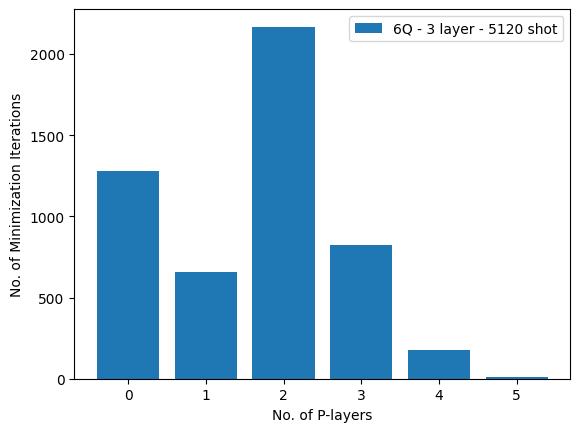

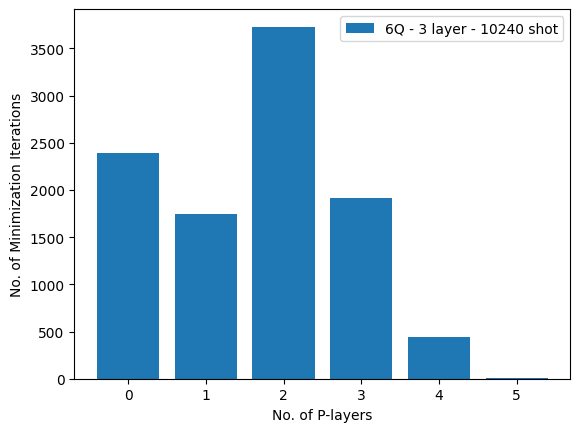

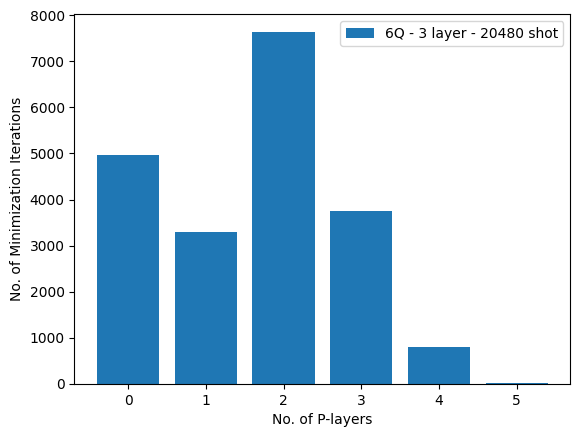

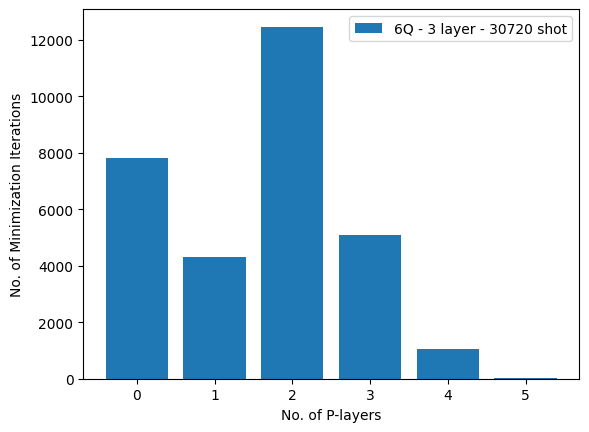

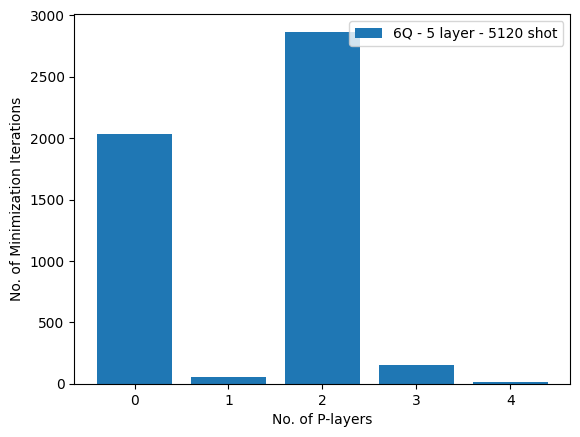

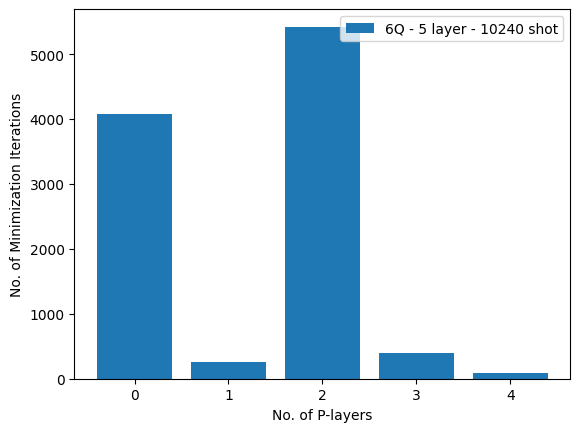

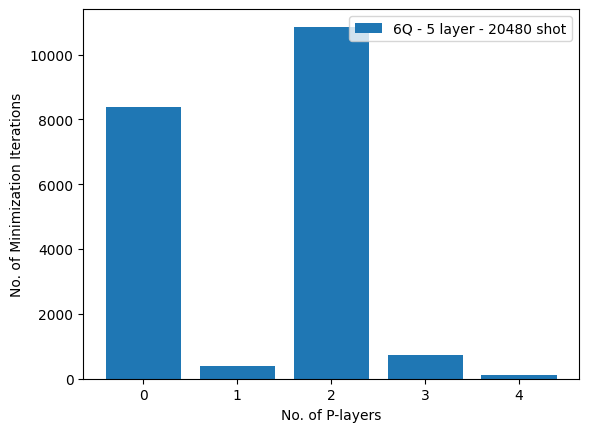

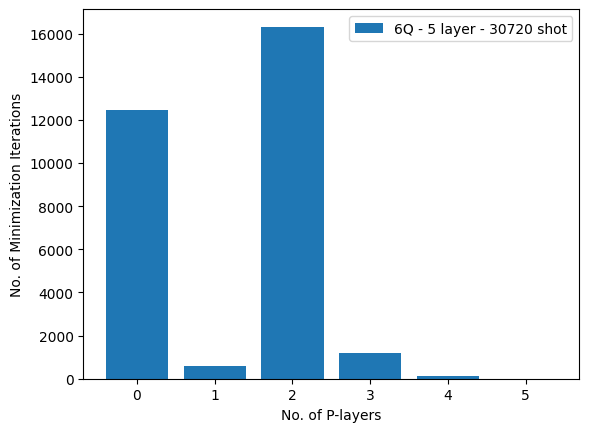

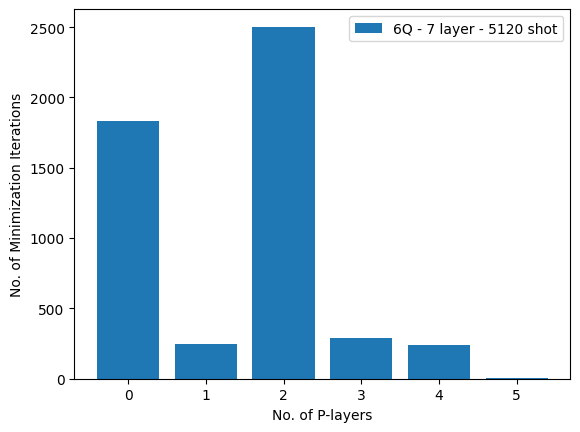

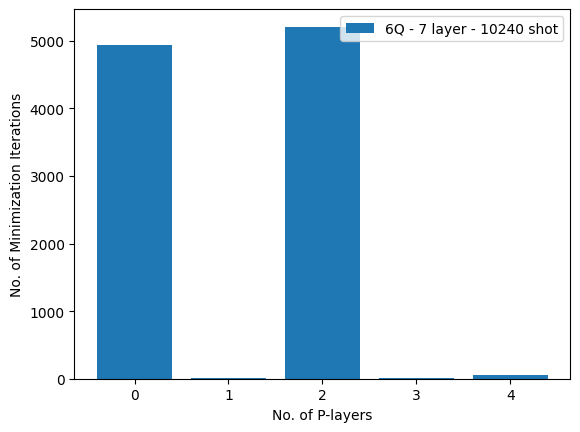

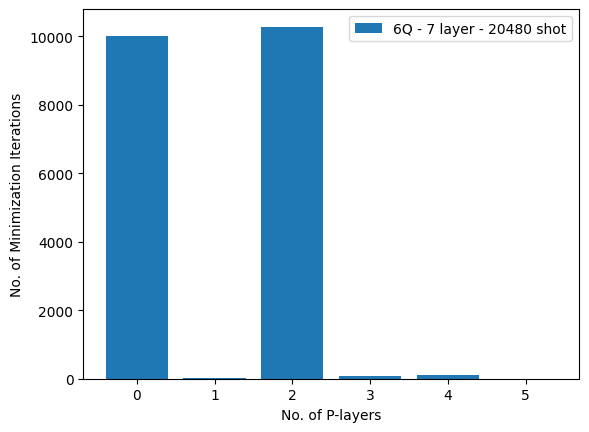

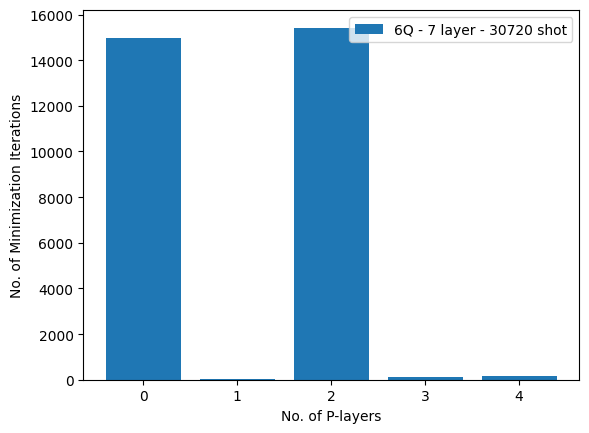

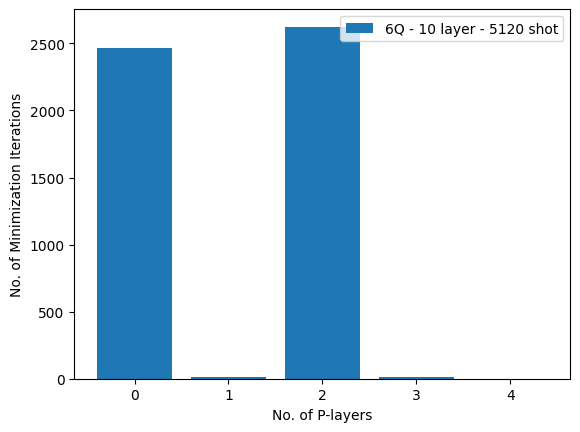

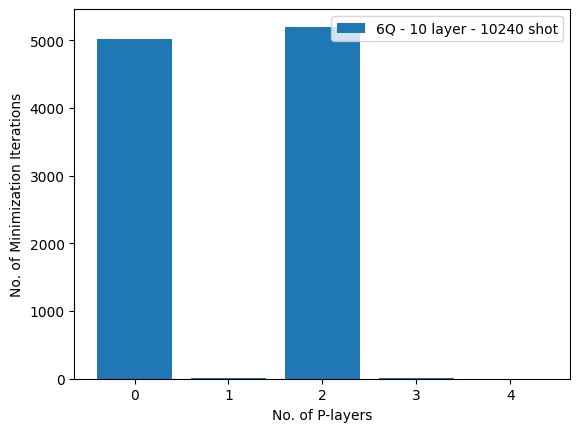

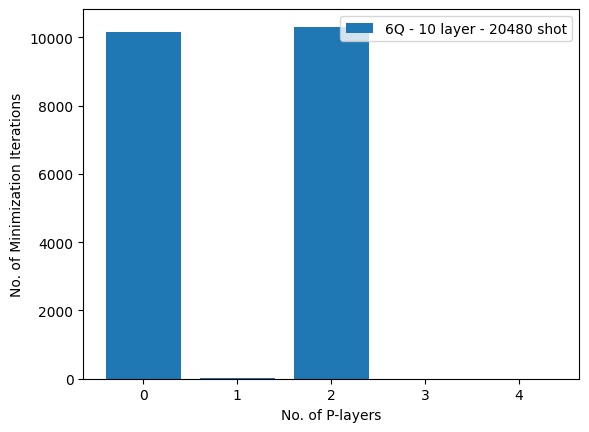

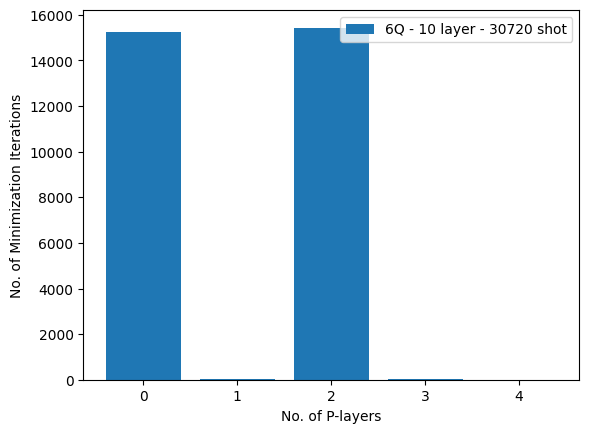

In [55]:
for layer in layers:
    for shot in shots:
        x = list(xy6[layer][shot].keys())
        y = list(xy6[layer][shot].values())
        
        plt.figure()
        plt.bar(x, y, label=f'6Q - {layer} layer - {shot} shot')
        plt.xlabel("No. of P-layers")
        plt.ylabel("No. of Minimization Iterations")
        plt.savefig(save_path+f"/6_{layer}_{shot}_shots-solution.eps", format='eps')
        plt.legend()

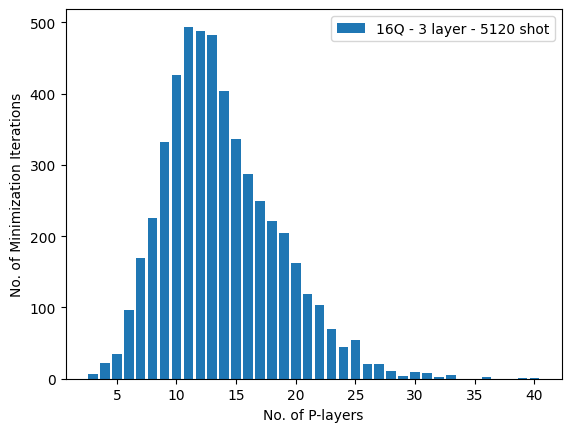

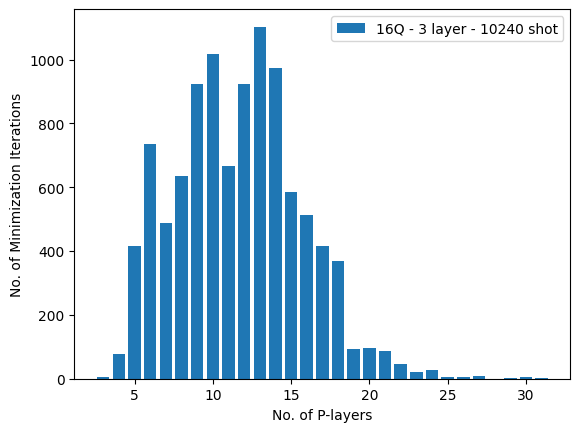

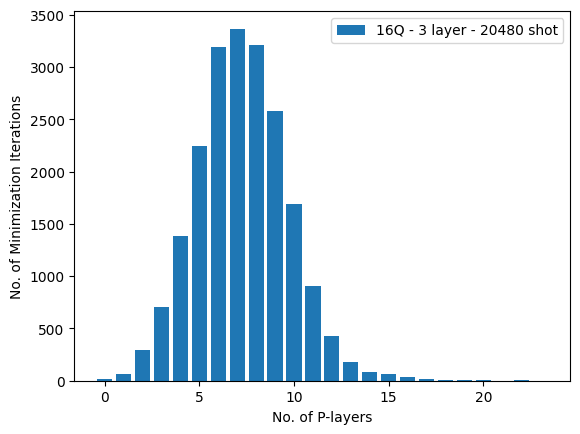

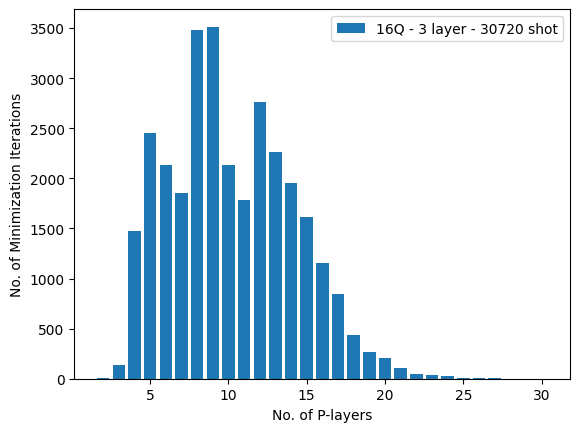

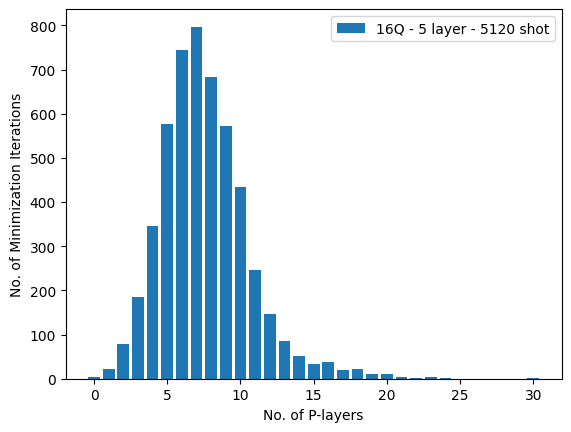

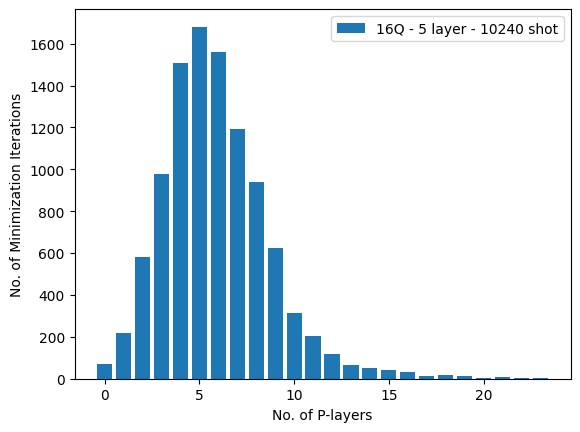

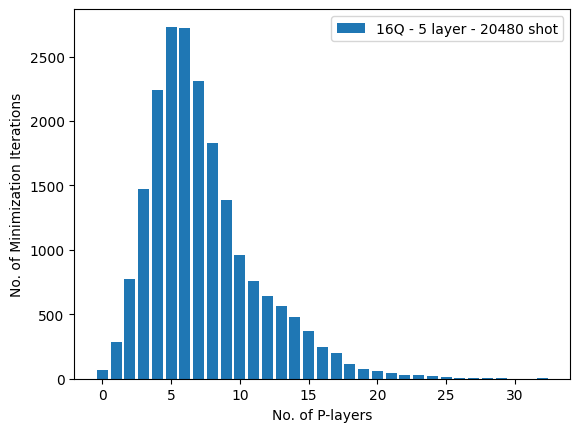

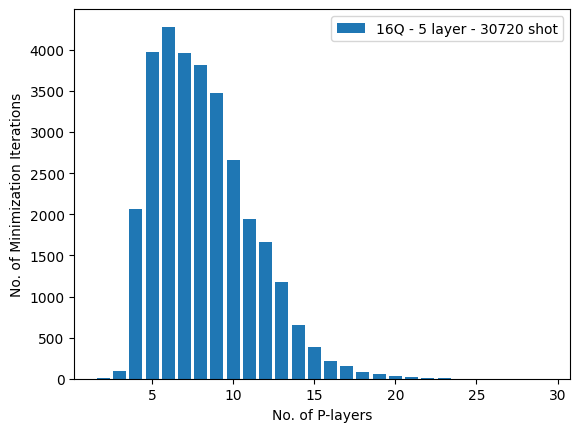

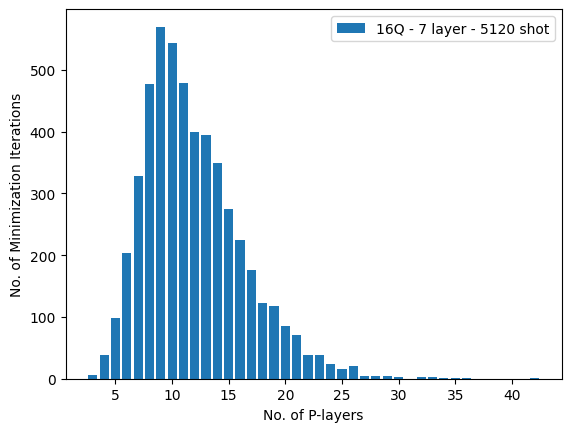

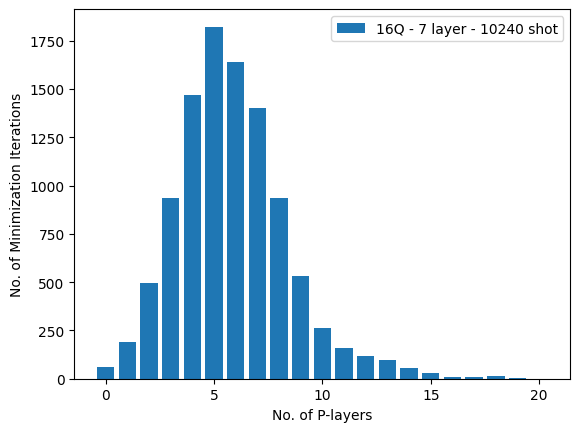

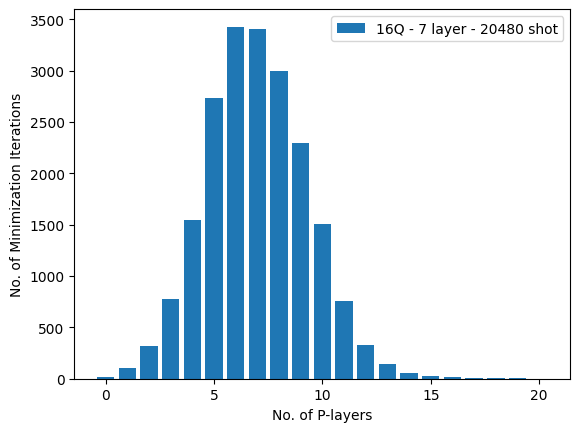

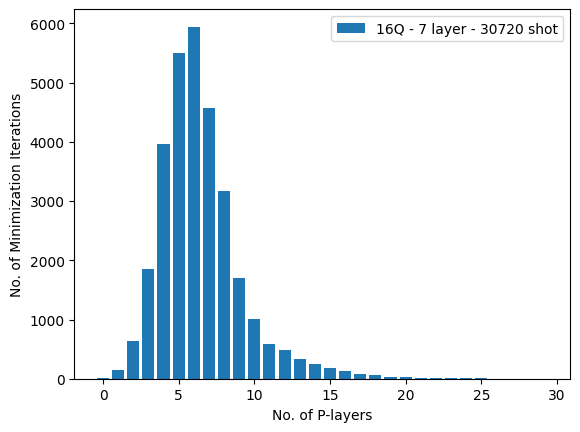

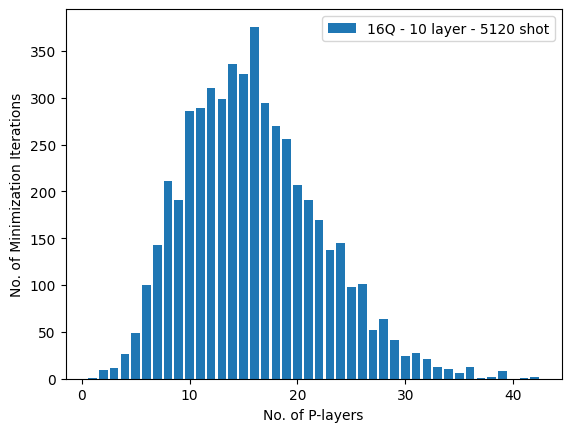

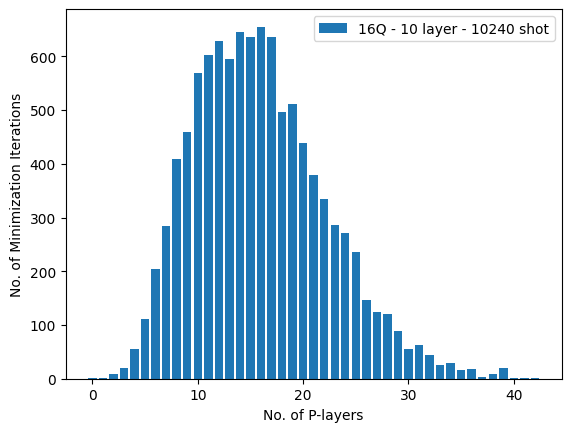

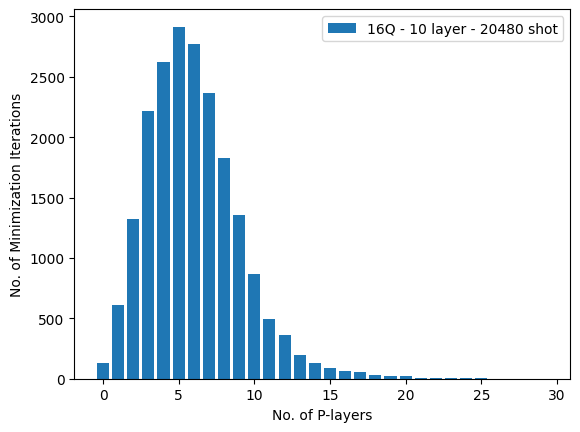

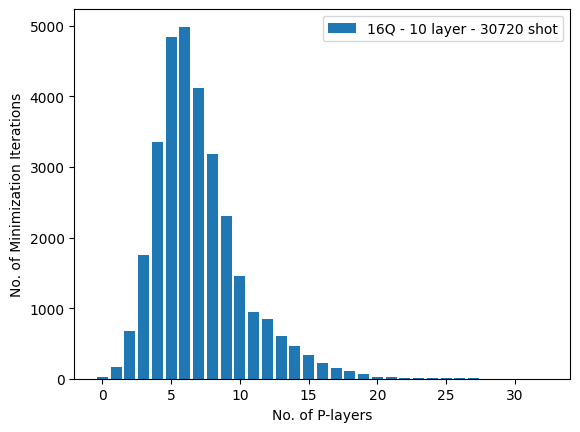

In [56]:
for layer in layers:
    for shot in shots:
        x = list(xy16[layer][shot].keys())
        y = list(xy16[layer][shot].values())
        
        plt.figure()
        plt.bar(x, y, label=f'16Q - {layer} layer - {shot} shot')
        plt.xlabel("No. of P-layers")
        plt.ylabel("No. of Minimization Iterations")
        plt.savefig(save_path+f"/16_{layer}_{shot}_shots-solution.eps", format='eps')
        plt.legend()

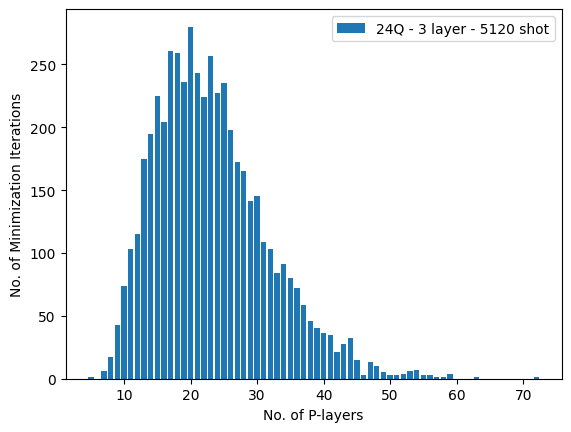

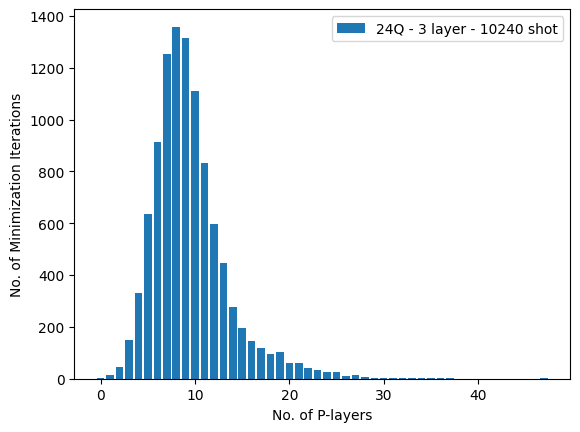

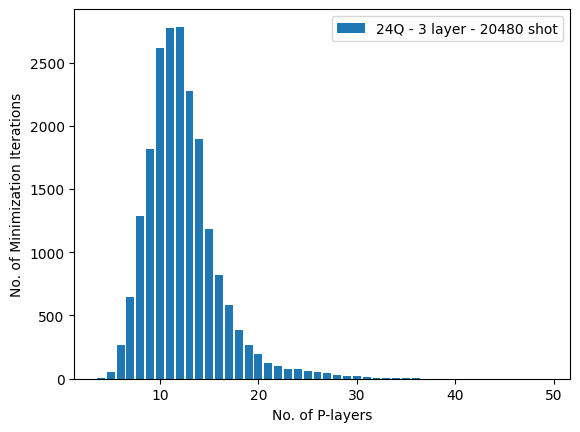

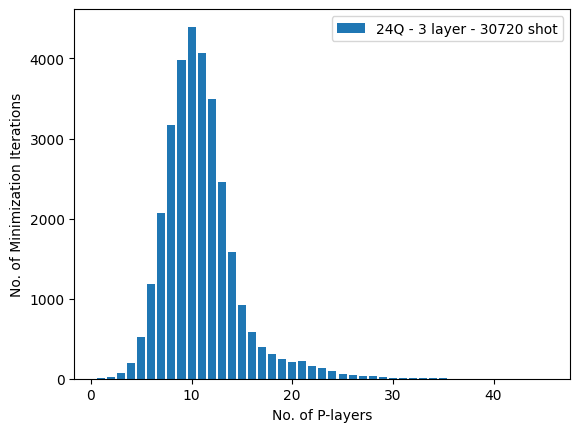

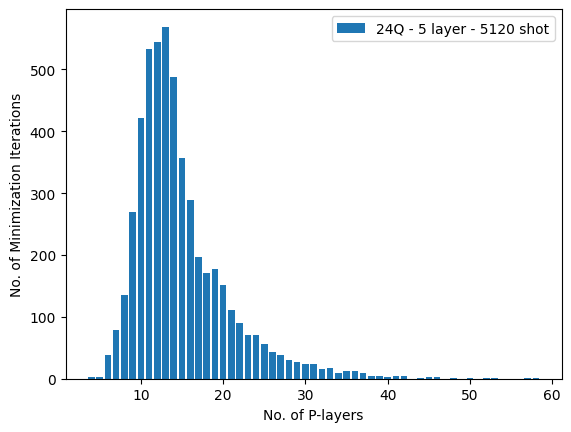

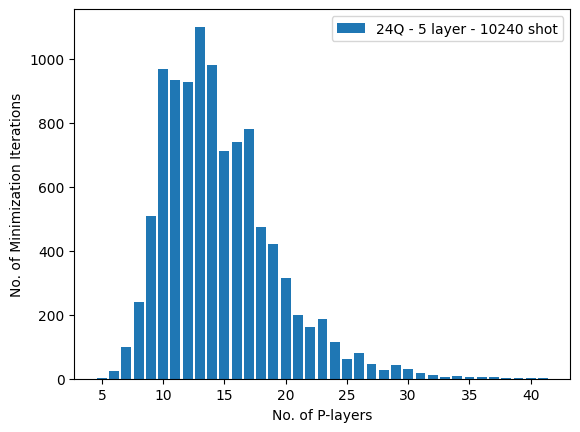

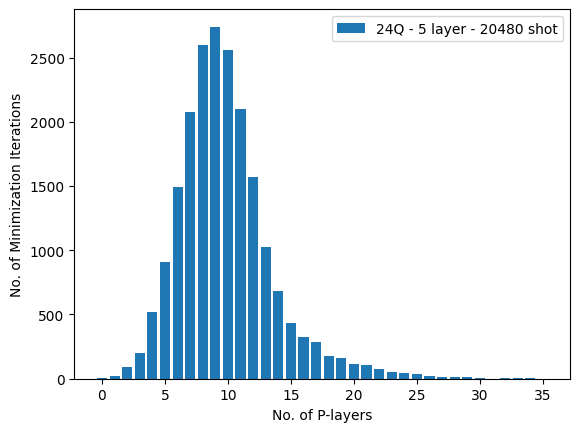

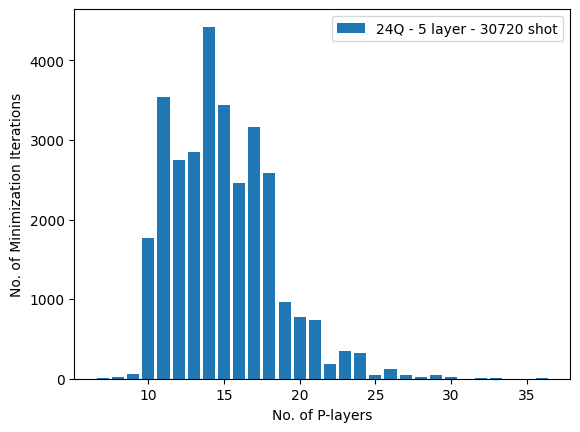

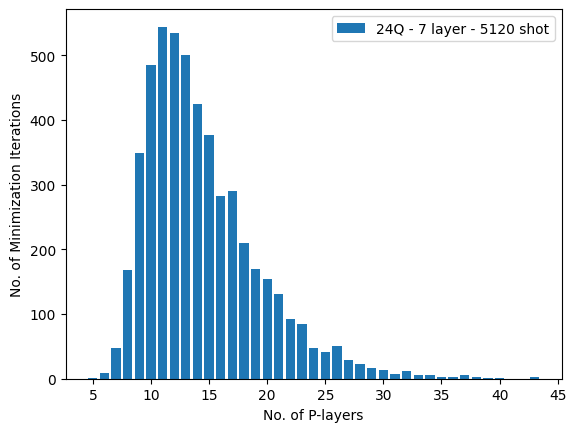

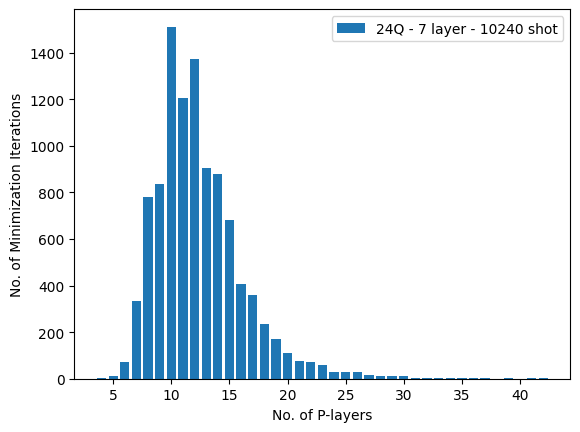

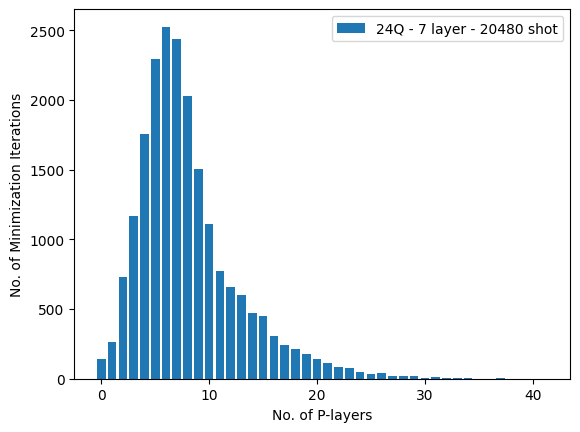

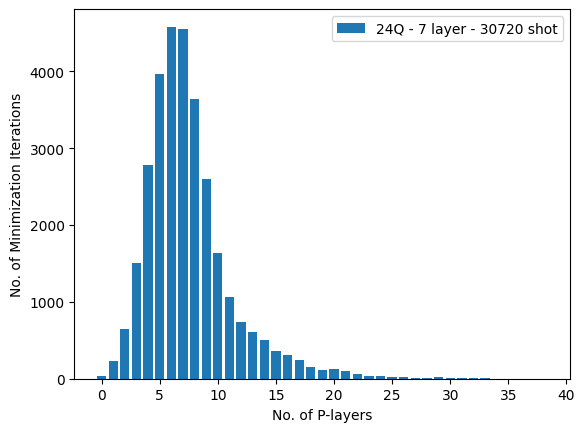

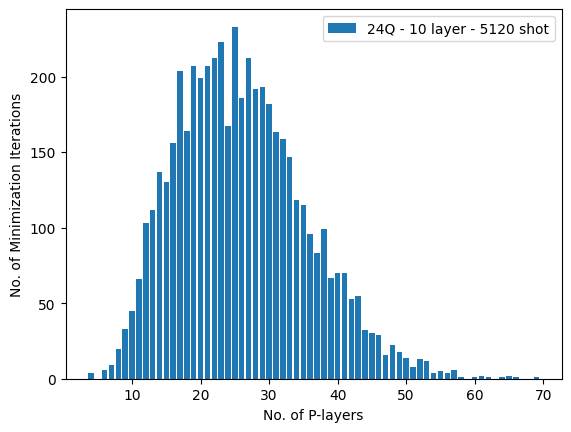

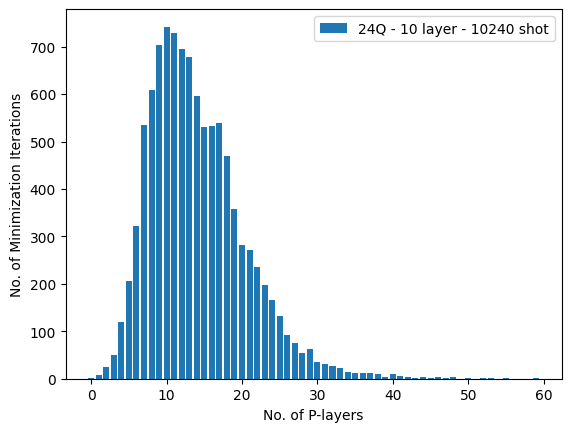

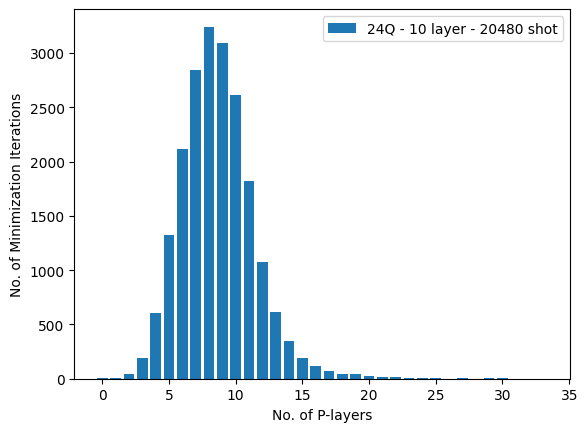

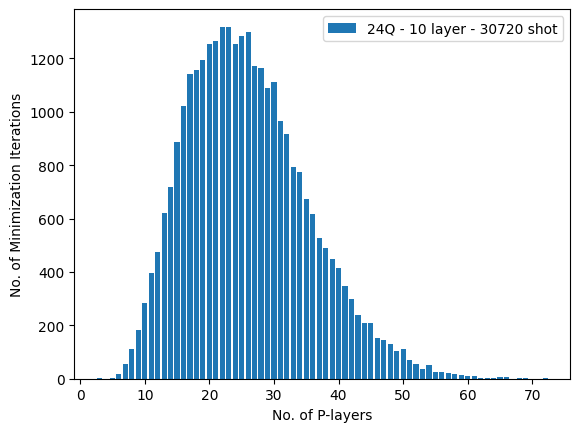

In [57]:
for layer in layers:
    for shot in shots:
        x = list(xy24[layer][shot].keys())
        y = list(xy24[layer][shot].values())
        
        plt.figure()
        plt.bar(x, y, label=f'24Q - {layer} layer - {shot} shot')
        plt.xlabel("No. of P-layers")
        plt.ylabel("No. of Minimization Iterations")
        plt.savefig(save_path+f"/24_{layer}_{shot}_shots-solution.eps", format='eps')
        plt.legend()